# Análisis y visualización de datos

Con el objetivo de ir entendiendo la naturaleza de los datos y su modo de presentación de grafos, vamos a ir analizando los distintos tipos de nodos con sus características.

Se puede comenzar por los siguientes puntos y luego agregar otros de interés:

1- Cantidad de Personas por Edades, aqui podemos analizar la distribución de las personas de todos los equipos de trabajo, otro análisis que se puede realizar es determinar el mismo análisis pero separado por sexo.

2- Existe otro factor importante para determinar el grado de conocimiento determinado por su Seniority (organizados como Senior, Semi-senior y Junior, siendo este último el de menos experiencia), aqui podemos determinar el nivel de expertís sobre las tecnologías a analizar y con ello determinar si los equipos están altamente especializados con perfiles senior o balancean su capacidad de trabajo con perfiles de menos experiencia.
Otro factor importante a analizar es el grado de participación de las mujeres ya que de esta manera se pueden aumentar la participación de mujeres en caso de que sea muy escasa.

3- Se correlacionan las edades de las personas con los años de experiencia, que nivel de participación se observa por sexo?

4- Cuales con los conocimientos que más poseen las personas?
Teniendo en cuenta que más adelante queremos equilibrar los conocimientos que tecnologias son las dominantes? , que nivel de participación se observa por sexo?

No olvidar responder a los puntos anteriores también con las visualizaciones apropiadas.

Tip: una visualización interesante para la frecuencia de palabras es la WordCloud.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import GridSearchCV

In [2]:
#Lectura
# Vamos a abrir los archivos que poseen la información
# El primer archivo posee los nodos que contienen a las personas, skills, conocimientos, team  (como se explicó en el dataset)
# Aqui se encuentran todos los features de acuerdo al tipo de nodo
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes3.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships3.csv')

#Display HTML
display(nodos.head())
display(relaciones.head())

,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience
0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0
1,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0
2,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0
3,eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...,Luis D,person,senior,male,33.0,8.0
4,40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...,Edgardo O,person,senior,male,42.0,9.0


,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship
0,e1e8ce3faf08dd3c935ef958ab7214bb-a87ff679a2f3e...,Airflow,263db3933c2cb8e9b139373fdd57defb-a87ff679a2f3e...,Integracion,099fa6035a5eab7a8dcb3f7c29b9cb78-a87ff679a2f3e...
1,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,7e978e6cfaa3e6de95722312e007357f-a87ff679a2f3e...,Hadoop,37a61163e6daf34ffc4cfdd85983981b-c81e728d9d4c2...
2,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,fdbea0fad95c6f981f32120701d8f1d3-a87ff679a2f3e...,MariaDB,d7a45d0731835e6d51b701cce147e296-c81e728d9d4c2...
3,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...,SQL Server,71bef141a7e6d0aafec0c65f0b4a28d7-c81e728d9d4c2...
4,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,e9305b36f4ce5b64e3ffdde4cb4414df-a87ff679a2f3e...,MySQL,44e93078bffadc6bf8d4f6b69285c6f3-c81e728d9d4c2...


# Generamos estadísticas descriptivas del nodo.


In [3]:
nodos.describe()

,n.age,n.experience
count,55.000000,47.000000
mean,25.036364,5.702128
std,14.997486,4.736146
min,0.000000,0.000000
25%,22.000000,3.000000
50%,27.000000,4.000000
75%,35.000000,8.000000
max,52.000000,27.000000


Analizamos los tipos de datos de cada campo inferidos por panda de los nodos

Analizamos los tipos de datos de cada campo inferidos por pandas de las relaciones



In [4]:
# Generamos estadísticas descriptivas de las relaciones
relaciones.describe()

,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship
count,383,383,383,383,383
unique,93,93,100,99,383
top,eeca1815ef2efc089f12bfe8c1c4c7f7-c81e728d9d4c2...,Team3,35c4798d0240368c638e55bae0d57ffa-a87ff679a2f3e...,Linux,cdeaf7605128ab561e914db394f06237-c81e728d9d4c2...
freq,16,16,32,32,1


In [5]:
dtypes = pd.DataFrame(relaciones.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

,Tipo
Campo,
id_node_a,object
name_node_a,object
id_node_b,object
name_node_b,object
id_relationship,object


In [6]:
# En el caso de querer trabajar solo con las personas se puede aplicar lo siguiente:
#Drop Nodos que no sean personas
personas = nodos[nodos["n.type"] == "person"]

#Display html
display(personas)

,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience
0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0
1,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0
2,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0
3,eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...,Luis D,person,senior,male,33.0,8.0
4,40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...,Edgardo O,person,senior,male,42.0,9.0
5,39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...,Hernan U,person,semi-senior,male,22.0,7.0
6,f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2...,Cristian G,person,senior,male,37.0,10.0
7,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0
8,c720cbe09318399805229024f20a1822-c81e728d9d4c2...,Armando I,person,semi-senior,male,23.0,8.0
9,0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...,Ursula P,person,junior,female,39.0,5.0


In [7]:
dtypes = pd.DataFrame(personas.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

,Tipo
Campo,
n.id,object
name_node_a,object
n.type,object
n.category,object
n.gender,object
n.age,float64
n.experience,float64


Vamos a necesitar conocer los tipos de datos en caso de querer trabajar con el dataset de personas

In [8]:
personas.describe()

Campo,n.age,n.experience
count,43.000000,43.000000
mean,32.023256,6.232558
std,7.753612,4.602469
min,21.000000,2.000000
25%,25.000000,3.000000
50%,33.000000,5.000000
75%,37.000000,8.000000
max,52.000000,27.000000


Para visualizar la distribución de las edades

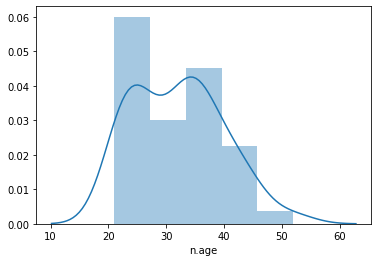

In [9]:
import seaborn as sns
sns.distplot(personas['n.age'], kde=True);


Para calcular la probabilidad de los valores posibles sexo y seniority (category), una forma más sencilla con la operación value_counts de pandas.


In [10]:
data = personas['n.gender'].value_counts(normalize=True).reset_index()
data

,index,n.gender
0,male,0.72093
1,female,0.27907


In [11]:
data = personas['n.category'].value_counts(normalize=True).reset_index()
data

,index,n.category
0,senior,0.418605
1,semi-senior,0.325581
2,junior,0.255814


Para poder trabajar con ambos dataset necesitamos hacer lo siguiente

In [12]:
resultante = nodos.merge(relaciones, left_on='n.id', right_on='id_node_a')

In [13]:
display(resultante.head())

Campo,n.id,name_node_a_x,n.type,n.category,n.gender,n.age,n.experience,id_node_a,name_node_a_y,id_node_b,name_node_b,id_relationship
0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,e8173ce541b175489ea47a083af3b629-a87ff679a2f3e...,AWS,799db43b85fc5aea452158adecba29d1-c81e728d9d4c2...
1,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,cf4ec00e901dcb90f14e990f0b920412-c81e728d9d4c2...
2,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,43b6f263edd9539008d17939797e828c-a87ff679a2f3e...,Golden Gate,d6f14eb3b7830926d80bced8ac29a918-c81e728d9d4c2...
3,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,202a4729f08cfad5658fb7a6fb4ab47a-a87ff679a2f3e...,java,76ea087724a22e038dd22219eb4b6823-c81e728d9d4c2...
4,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,7658e020131c329d176f7ad2d46b0c42-a87ff679a2f3e...,Oracle,fc1090bc305bfd4455357aa542e00eef-c81e728d9d4c2...


Si queremos trabajar con las colunmas de padre e hijo de esta primer relación

In [14]:
resultante[resultante['n.type']=='person'][['n.category','name_node_a_y','name_node_b']]

Campo,n.category,name_node_a_y,name_node_b
0,junior,David H,AWS
1,junior,David H,DBA
2,junior,David H,Golden Gate
3,junior,David H,java
4,junior,David H,Oracle
...,...,...,...
295,senior,Martin,Data Scientist
296,senior,Martin,Vertica
297,senior,Martin,SQL Server
298,senior,Martin,phyton


# Análisis exploratorio y curación de datos
En ésta entrega se comenzará a preparar el dataset para los prácticos siguientes. Algunos puntos de aquí ya han sido cubiertos en la entrega anterior para hacer el análisis. Otros pueden tener un tratamiento especial según nuestro enfoque de NLP.

## Listado de puntos a cubrir en análisis y curación:

a. Asegurarse de tener ids/claves únicas
b. Chequear que no haya datos duplicados
c. No usar caracteres especiales en las etiquetas de variables
d. Verificar que no haya problemas de codificación/encoding
e. Verificar la consistencia de las variables
f. Identificar y documentar valores atípicos/outliers. Qué outliers pueden haberse encontrado en el análisis del práctico previo?
g. Tratar valores faltantes: quitar o imputar. En éste caso, se correspondería tambien con buscar si hay conversaciones vacías, y quitarlas ya que no aportarían nada a los prácticos siguientes
h. Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas. Aquí ya se puede empezar a pensar en vectorizar las frases para los prácticos posteriores.
Con los puntos anteriores ya se puede preparar los datasets que vamos a usar más adelante.

DATASET1- Preparar un dataset para usar modelos supervisados. Éste debe incluir las personas, los conocimientos, los perfiles (skills) opcional (los teams), que son las que se van a usar para en armar una regresión lineal sobre las personas con los años de experiencias vs el ranking que posee de sus conocimientos.

DATASET2- Preparar el dataset para el práctico de aprendizaje no supervisado. Éste está orientado a descubrir dentificar los perfiles que puede poseer cada persona, en base a ciertas personas ya clasificadas, por lo que en éste caso debe filtrar éste subconjunto de perfiles (Skills).

Por último, guarde los datasets en un formato conveniente para usar después. Importante: guardarlos en nuevos archivos para no sobreescribir los datos crudos u originales


# Introducción al aprendizaje automático

Lo primero que tenemos que entender es la jerarquía de los datos organizados en grafos de acuerdo a lo que necesitemos.
En este caso:
* Skills: nodo tipo skill
* Personas: not tipo person
* Tecnologias: nodo tipo knowledge

Con estas vinculaciones trataremos de responder a la pregunta de la relación entre el conocimiento que poseen las personas y sus años de experiencia.


In [15]:
# Repetimos aquí la carga de los archivos
import pandas as pd
import numpy as np

#Lectura
# Vamos a abrir los archivos que poseen la información
# El primer archivo posee los nodos que contienen a las personas, skills, conocimientos, team  (como se explicó en el dataset)
# Aqui se encuentran todos los features de acuerdo al tipo de nodo
nodos = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/nodes3.csv')

# El segundo archivo posee la relación que existen entre los nodos es decir un nodo persona tiene conocimientos vinculados que es lo que sabe
relaciones = pd.read_csv(
    'https://raw.githubusercontent.com/fgpalacios/diplodatos2020/master/dataset/relationships3.csv')

#Display HTML
display(nodos.head())
display(relaciones.head())

,n.id,name_node_a,n.type,n.category,n.gender,n.age,n.experience
0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0
1,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0
2,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0
3,eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...,Luis D,person,senior,male,33.0,8.0
4,40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...,Edgardo O,person,senior,male,42.0,9.0


,id_node_a,name_node_a,id_node_b,name_node_b,id_relationship
0,e1e8ce3faf08dd3c935ef958ab7214bb-a87ff679a2f3e...,Airflow,263db3933c2cb8e9b139373fdd57defb-a87ff679a2f3e...,Integracion,099fa6035a5eab7a8dcb3f7c29b9cb78-a87ff679a2f3e...
1,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,7e978e6cfaa3e6de95722312e007357f-a87ff679a2f3e...,Hadoop,37a61163e6daf34ffc4cfdd85983981b-c81e728d9d4c2...
2,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,fdbea0fad95c6f981f32120701d8f1d3-a87ff679a2f3e...,MariaDB,d7a45d0731835e6d51b701cce147e296-c81e728d9d4c2...
3,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,2320e632b8e006a33216f6b3a1c78578-a87ff679a2f3e...,SQL Server,71bef141a7e6d0aafec0c65f0b4a28d7-c81e728d9d4c2...
4,533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e...,Andrea,e9305b36f4ce5b64e3ffdde4cb4414df-a87ff679a2f3e...,MySQL,44e93078bffadc6bf8d4f6b69285c6f3-c81e728d9d4c2...


In [16]:
nodos['n.type'].unique()

array(['person', 'team', nan, 'technologies', 'skill', 'info'],
      dtype=object)

Trabajemos solo con los nodos Skills, Person y Technologies


In [17]:
#Definimos un dataset de skill
skills = nodos[nodos["n.type"] == "skill"]

# Mejoramos los nombres de las columnas
skills.columns = skills.columns.str.replace('n.id', 'skill_id')
skills.columns = skills.columns.str.replace('name_node_a', 'skill_name')
skills.columns = skills.columns.str.replace('n.type', 'skill_type')
# Extractamos solo las columnas necesarias
skills = skills[['skill_id','skill_name','skill_type']]
skills

,skill_id,skill_name,skill_type
100,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill
101,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill
102,ac894b03f495d68a60f2d786e79aa1e3-a87ff679a2f3e...,Data Architect,skill
103,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill
104,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill
105,a8cea7ec2709db07e628b80e2dafa2b6-a87ff679a2f3e...,Data Engineer,skill


In [18]:
#Definimos un dataset de personas
persons = nodos[nodos["n.type"] == "person"]
# persons['n.id']
#Mejoramos los nombres
persons.columns = persons.columns.str.replace('n.id', 'person_id')
persons.columns = persons.columns.str.replace('name_node_a', 'person_name')
persons.columns = persons.columns.str.replace('n.type', 'person_type')
persons.columns = persons.columns.str.replace('n.category', 'person_category')
persons.columns = persons.columns.str.replace('n.gender', 'person_gender')
persons.columns = persons.columns.str.replace('n.age', 'person_age')
persons.columns = persons.columns.str.replace('n.experience', 'person_experience')

persons.set_index('person_id')
persons

,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience
0,d0cc3fdcaeef9e0fcc60297d4ffa19ca-c81e728d9d4c2...,David H,person,junior,male,29.0,3.0
1,f6c552ee146d8ade3d4c2652142a1c4c-c81e728d9d4c2...,Walter L,person,senior,male,52.0,27.0
2,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0
3,eff4f32dcad4db51e88c86309c9e8338-c81e728d9d4c2...,Luis D,person,senior,male,33.0,8.0
4,40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2...,Edgardo O,person,senior,male,42.0,9.0
5,39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...,Hernan U,person,semi-senior,male,22.0,7.0
6,f88809881dcdc1fd5867398a3a389a11-c81e728d9d4c2...,Cristian G,person,senior,male,37.0,10.0
7,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0
8,c720cbe09318399805229024f20a1822-c81e728d9d4c2...,Armando I,person,semi-senior,male,23.0,8.0
9,0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...,Ursula P,person,junior,female,39.0,5.0


In [19]:
#Definimos un dataset de tecnologias
technologies = nodos[nodos["n.type"] == "technologies"]
#Mejoramos los nombres
technologies.columns = technologies.columns.str.replace('n.id', 'technology_id')
technologies.columns = technologies.columns.str.replace('name_node_a', 'technology_name')
technologies.columns = technologies.columns.str.replace('n.type', 'technology_type')
technologies = technologies.drop(columns='n.category',axis=1)
technologies = technologies.drop(columns='n.gender',axis=1)
technologies = technologies.drop(columns='n.age',axis=1)
technologies = technologies.drop(columns='n.experience',axis=1)
technologies

,technology_id,technology_name,technology_type
40,ff64319904f4832ee19df96250276033-c81e728d9d4c2...,Inst DB,technologies
41,17fc99d3f691680db18b948f4b9a4547-a87ff679a2f3e...,AWS Lambda,technologies
42,31985bb925fa449ee8d01350cb2f008d-a87ff679a2f3e...,AWS Kinesis,technologies
43,e75155594a0fd8405cde512bd9aaedad-a87ff679a2f3e...,DynamoDB,technologies
44,c75df195acce9063a96459de85bc72b9-a87ff679a2f3e...,Monta un Cluster Hadoop Big Data desde Cero,technologies
...,...,...,...
116,ffeffd6344800bfc7214b6d7ef83ea10-a87ff679a2f3e...,talend,technologies
117,362da8a51e150638e6981d0771534c8e-a87ff679a2f3e...,pentaho,technologies
118,263db3933c2cb8e9b139373fdd57defb-a87ff679a2f3e...,Integracion,technologies
119,de1284aa9ed99ad37c8259c2028b161c-a87ff679a2f3e...,ODI,technologies


In [20]:
#vamos a unir los dataset para analizarlos 
resultante = skills.merge(relaciones, left_on='skill_id', right_on='id_node_b')
resultante = resultante[['skill_id','skill_name','skill_type','id_node_a']]
resultante.set_index('id_node_a')
resultante



,skill_id,skill_name,skill_type,id_node_a
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...
1,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...
2,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...
3,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...
4,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...
5,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...
6,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...
7,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...
8,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...
9,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,dd05195a0be8a3102470e9d6955e49be-c81e728d9d4c2...


In [21]:
# Vamos a vincular con las personas
resultante = resultante.merge(persons, left_on='id_node_a', right_on='person_id')
resultante.merge(persons, left_on='id_node_a', right_on='person_id')


,skill_id,skill_name,skill_type,id_node_a,person_id_x,person_name_x,person_type_x,person_category_x,person_gender_x,person_age_x,person_experience_x,person_id_y,person_name_y,person_type_y,person_category_y,person_gender_y,person_age_y,person_experience_y
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0
1,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0
2,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...,9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...,Gustavo M,person,semi-senior,male,31.0,4.0,9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...,Gustavo M,person,semi-senior,male,31.0,4.0
3,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...,39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...,Hernan U,person,semi-senior,male,22.0,7.0,39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...,Hernan U,person,semi-senior,male,22.0,7.0
4,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...,044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...,Hugo S,person,semi-senior,male,23.0,5.0,044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...,Hugo S,person,semi-senior,male,23.0,5.0
5,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...,ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...,Luciano M,person,senior,male,26.0,8.0,ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...,Luciano M,person,senior,male,26.0,8.0
6,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...,57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...,Mariana T,person,semi-senior,female,32.0,4.0,57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...,Mariana T,person,semi-senior,female,32.0,4.0
7,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,Martin,person,senior,male,34.0,5.0,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,Martin,person,senior,male,34.0,5.0
8,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...,3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...,Natali L,person,semi-senior,female,24.0,4.0,3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...,Natali L,person,semi-senior,female,24.0,4.0
9,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0


In [22]:

# Quitamos la columna que nos sirvió para las relaciones
resultante = resultante.drop(columns='id_node_a',axis=1)
resultante 

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0
1,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0
2,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,9ea9cb2299b79282575e16262b514e2b-c81e728d9d4c2...,Gustavo M,person,semi-senior,male,31.0,4.0
3,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...,Hernan U,person,semi-senior,male,22.0,7.0
4,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2...,Hugo S,person,semi-senior,male,23.0,5.0
5,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...,Luciano M,person,senior,male,26.0,8.0
6,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,57908adf192c0ac2fa0e52f915ba26e9-c81e728d9d4c2...,Mariana T,person,semi-senior,female,32.0,4.0
7,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,8ebb5bf7f39a9ec7304a17cdf5063df9-a87ff679a2f3e...,Martin,person,senior,male,34.0,5.0
8,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2...,Natali L,person,semi-senior,female,24.0,4.0
9,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0


In [23]:
# Vamos a vincular con las relaciones de las tecnologias
resultante = resultante.merge(relaciones[['id_node_a','id_node_b']], left_on='person_id', right_on='id_node_a')
relaciones["name_node_a"].unique()
resultante = resultante.merge(technologies, left_on='id_node_b', right_on='technology_id')
resultante

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,id_node_a,id_node_b,technology_id,technology_name,technology_type
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,Docker,technologies
1,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,Docker,technologies
2,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,Docker,technologies
3,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2...,Martina S,person,junior,female,33.0,3.0,bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2...,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,Docker,technologies
4,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...,Ursula P,person,junior,female,39.0,5.0,0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,Docker,technologies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,c064dffb1a0f1a937b56ee9c0c0a0b9c-a87ff679a2f3e...,c064dffb1a0f1a937b56ee9c0c0a0b9c-a87ff679a2f3e...,unix,technologies
216,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,d37772bf703931e76d906eaafe580293-a87ff679a2f3e...,d37772bf703931e76d906eaafe580293-a87ff679a2f3e...,S3,technologies
217,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,886f0d10fd11a0fb8f50aa3b4eb4b2ba-a87ff679a2f3e...,886f0d10fd11a0fb8f50aa3b4eb4b2ba-a87ff679a2f3e...,EC2,technologies
218,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,ffeffd6344800bfc7214b6d7ef83ea10-a87ff679a2f3e...,ffeffd6344800bfc7214b6d7ef83ea10-a87ff679a2f3e...,talend,technologies


In [24]:
# Quitamos la columna que nos sirvió para las relaciones
resultante = resultante.drop(columns='id_node_a',axis=1)
resultante = resultante.drop(columns='id_node_b',axis=1)
resultante 

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,technology_id,technology_name,technology_type
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,Docker,technologies
1,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,Docker,technologies
2,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,55e0ba8f06e9cf98484855e3f989ed78-c81e728d9d4c2...,Dario O,person,semi-senior,male,34.0,3.0,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,Docker,technologies
3,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2...,Martina S,person,junior,female,33.0,3.0,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,Docker,technologies
4,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2...,Ursula P,person,junior,female,39.0,5.0,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,Docker,technologies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,c064dffb1a0f1a937b56ee9c0c0a0b9c-a87ff679a2f3e...,unix,technologies
216,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,d37772bf703931e76d906eaafe580293-a87ff679a2f3e...,S3,technologies
217,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,886f0d10fd11a0fb8f50aa3b4eb4b2ba-a87ff679a2f3e...,EC2,technologies
218,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,ffeffd6344800bfc7214b6d7ef83ea10-a87ff679a2f3e...,talend,technologies


In [25]:
# Calculamos la cantidad de tecnologias conocidas por cada persona y la almacenamos en el dataset de trabajo
dataset1 = resultante.groupby(['skill_name','person_gender', 'person_category','person_name','person_age','person_experience']).size().to_frame(name='Knowledge').reset_index()
dataset1



,skill_name,person_gender,person_category,person_name,person_age,person_experience,Knowledge
0,DBA,female,junior,Martina S,33.0,3.0,4
1,DBA,female,junior,Ursula P,39.0,5.0,5
2,DBA,male,junior,David H,29.0,3.0,5
3,DBA,male,semi-senior,Dario O,34.0,3.0,5
4,DBA,male,semi-senior,Gastón,27.0,3.0,3
5,DBA,male,senior,Jonatan,33.0,7.0,6
6,DBA,male,senior,Lucas,35.0,6.0,4
7,DBA,male,senior,Luis U,41.0,8.0,5
8,DBA,male,senior,Marcelo,41.0,12.0,7
9,Data Scientist,female,semi-senior,Mariana T,32.0,4.0,5


In [26]:
#Usaremos este dataset para avanzar con los aspectos de Aprendizaje Automático
dataset1

,skill_name,person_gender,person_category,person_name,person_age,person_experience,Knowledge
0,DBA,female,junior,Martina S,33.0,3.0,4
1,DBA,female,junior,Ursula P,39.0,5.0,5
2,DBA,male,junior,David H,29.0,3.0,5
3,DBA,male,semi-senior,Dario O,34.0,3.0,5
4,DBA,male,semi-senior,Gastón,27.0,3.0,3
5,DBA,male,senior,Jonatan,33.0,7.0,6
6,DBA,male,senior,Lucas,35.0,6.0,4
7,DBA,male,senior,Luis U,41.0,8.0,5
8,DBA,male,senior,Marcelo,41.0,12.0,7
9,Data Scientist,female,semi-senior,Mariana T,32.0,4.0,5


In [27]:
#Listamos las tecnologías para crear columnas adicionales
newColumns = resultante['technology_name'].unique()
newColumns

array(['Docker', 'Hadoop', 'java', 'scala', 'Spark', 'AWS Lambda',
       'phyton', 'Kubernetes', 'Linux', 'MySQL', 'SQL Server', 'R',
       'Google cloud', 'PostgreSQL', 'AWS', 'MongoDB', 'Vertica', 'ODI',
       'Golden Gate', 'Oracle', 'pentaho', 'windows', 'SQL', 'MariaDB',
       'Oracle Cloud', 'Redis', 'Azure', 'unix', 'S3', 'EC2', 'talend',
       'neo4j'], dtype=object)

In [28]:
#Creamos un dataframe con los nombres de las nuevas columnas
dataTechnologies = pd.DataFrame(resultante,
 columns=newColumns, index=resultante['skill_id'])
dataTechnologies

,Docker,Hadoop,java,scala,Spark,AWS Lambda,phyton,Kubernetes,Linux,MySQL,...,SQL,MariaDB,Oracle Cloud,Redis,Azure,unix,S3,EC2,talend,neo4j
skill_id,,,,,,,,,,,,,,,,,,,,,
6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e71d9181a67b7542122c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Creamos un dataset para indicar las tecnologias
dataset2 = resultante.merge(dataTechnologies, left_on='skill_id', right_on='skill_id')
dataset2

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,...,SQL,MariaDB,Oracle Cloud,Redis,Azure,unix,S3,EC2,talend,neo4j
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13385,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13386,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13387,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13388,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Eliminamos los duplicados 
dataset2 = dataset2.drop_duplicates()
dataset2
  

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,...,SQL,MariaDB,Oracle Cloud,Redis,Azure,unix,S3,EC2,talend,neo4j
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...,Hernan U,person,semi-senior,male,22.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...,Luciano M,person,senior,male,26.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13175,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13218,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13261,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13304,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Verficamos los conocimientos de una persona
dataset2[dataset2['person_name']=='Matias']


,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,...,SQL,MariaDB,Oracle Cloud,Redis,Azure,unix,S3,EC2,talend,neo4j
5435,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7155,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8015,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8875,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,10c246e19e023f335e179b937c28a6da-c81e728d9d4c2...,Matias,person,junior,male,25.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Dataset
Trabajar con el dataset1 (donde el conocimiento está resumido en la columna knowlegde) y dataset2 (donde el conocimiento está armado como columnas individuales) para analizar posibles resultados


In [32]:
dataset1

,skill_name,person_gender,person_category,person_name,person_age,person_experience,Knowledge
0,DBA,female,junior,Martina S,33.0,3.0,4
1,DBA,female,junior,Ursula P,39.0,5.0,5
2,DBA,male,junior,David H,29.0,3.0,5
3,DBA,male,semi-senior,Dario O,34.0,3.0,5
4,DBA,male,semi-senior,Gastón,27.0,3.0,3
5,DBA,male,senior,Jonatan,33.0,7.0,6
6,DBA,male,senior,Lucas,35.0,6.0,4
7,DBA,male,senior,Luis U,41.0,8.0,5
8,DBA,male,senior,Marcelo,41.0,12.0,7
9,Data Scientist,female,semi-senior,Mariana T,32.0,4.0,5


In [33]:
dataset2

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,...,SQL,MariaDB,Oracle Cloud,Redis,Azure,unix,S3,EC2,talend,neo4j
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...,Hernan U,person,semi-senior,male,22.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...,Luciano M,person,senior,male,26.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13175,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13218,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13261,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13304,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocesamiento
En el dataset2, colocar valores 1 o 0 a quienes tengan conocimiento de las tecnologias y fusionar las personas para tener una sola fila persona con sus conocimientos

# Dataset para Problema de Clasificación Binario
Si bien nuestro problema original es uno de clasificación múltiple, comenzaremos por tratarlo como un problema de clasificación binario, en donde nuestro objetivo será:

0 = Corresponde a una persona con poca experiencia (person_category = junior o person_category = semi-senior

1 = Corresponde a una persona con poca experiencia (person_category = senior

Es decir, queremos identificar las personas con alto perfil de las que tienen poco . En base a esta definición, deben transformar el dataset para adaptarlo a un problema de clasifiación binario.

¿Cómo luce ahora el balance de clases? ¿Tomarán alguna decisión al respecto?


### Mezca Aleatória y División en Train/Test
Finalmente, están en condiciones de dividir el dataset en Train y Test, utilizando para este último conjunto un 20% de los datos disponibles. Previo a esta división, es recomendable que mezclen los datos aleatoriamente. De este modo, deberán obtener cuatro conjuntos de datos, para cada uno de los datasets: X_train, X_test, y_train y y_test

## Aplicación de Modelos de Clasificación
Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación para ambos datasets, utilizando la librería Scikit-Learn:

1. Perceptron. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
2. K Nearest Neighbors ó K Vecinos Más Cercanos
3. Regresión Lineal.
4. Regresión Logística. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
Para cada uno de ellos, se pide responder las siguientes consignas:

Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?
Obtener accuracy o exactitud.
De estos tres tipos de modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Elegir el modelo que consideren que mejor aplica a nuestro problema. Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

1. Descripción de la Hipótesis
¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

2. Selección de Regularizador
¿Utilizarán algún regularizador?¿Cuál?

3. Selección de Función de Costo
¿Cuál será la función de costo utilizada?

4. Justificación de las Selecciones
¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros.
Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
Accuracy o exactitud
Reporte de clasificación
Confusion matrix o matriz de confusión (graficar como heatmap)
Curva ROC y área bajo la curva (AUC).
Entregables
El entregable de este práctico consiste en esta misma Notebook, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

# Observaciones de Trabajo
**No trabajaron con el dataset2**
Podemos darlo como válido pero justifiquen porque usaron ese dataset

* No hay una clara declaración de los puntos 1, 2, 3 y 4
* No usaron GridSearch para el modelo seleccionado

433: utils.plot_decision_boundary(lambda x: model.predict(x), Xtrain, y_train.T)
No graficaron  el test.

437: KNeighborsClassifier 
No graficaron.

# Aprendizaje Supervisado


### Preprocesamiento
En el dataset2, colocar valores 1 o 0 a quienes tengan conocimiento de las tecnologias y fusionar las personas para tener una sola fila persona con sus conocimientos

In [34]:
dataset2

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,...,SQL,MariaDB,Oracle Cloud,Redis,Azure,unix,S3,EC2,talend,neo4j
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...,Hernan U,person,semi-senior,male,22.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...,Luciano M,person,senior,male,26.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13175,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13218,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13261,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13304,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
dataset3 = pd.get_dummies(dataset2, columns=['technology_name'])
dataset3

,skill_id,skill_name,skill_type,person_id,person_name,person_type,person_category,person_gender,person_age,person_experience,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
0,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,...,0,0,0,0,0,0,0,0,0,0
47,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,51280652ee54bf9e25636110b859faf5-a87ff679a2f3e...,Fernando,person,semi-senior,male,28.0,4.0,...,0,0,0,0,0,0,0,0,0,0
94,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,db613b3df019e3965aa17fdcfd3e5f33-c81e728d9d4c2...,Diego M,person,senior,male,35.0,11.0,...,0,0,0,0,0,0,0,0,0,0
141,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2...,Hernan U,person,semi-senior,male,22.0,7.0,...,0,0,0,0,0,0,0,0,0,0
188,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,ed9495ddeec42cfb3fcd3e2bddd199cb-c81e728d9d4c2...,Luciano M,person,senior,male,26.0,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13175,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,...,0,0,0,0,0,0,0,0,1,0
13218,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,...,0,0,0,0,0,0,0,0,0,0
13261,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2...,Daniel,person,senior,male,44.0,11.0,...,0,0,0,0,0,0,0,0,0,0
13304,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,bcb93d9680b08656367b3682a9b4c127-c81e728d9d4c2...,Lionel,person,semi-senior,male,35.0,3.0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
dataset3 = dataset3.groupby('person_id').max()
dataset3

,skill_id,skill_name,skill_type,person_name,person_type,person_category,person_gender,person_age,person_experience,technology_id,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
person_id,,,,,,,,,,,,,,,,,,,,,
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f636f067f89cc14862c,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,Susana S,person,senior,female,36.0,8.0,f61ef2e9dee2b13b9d5bc95d26cd2ce4-a87ff679a2f3e...,...,0,0,1,0,0,0,0,0,0,0
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f636f067f89cc14862c,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,Hugo S,person,semi-senior,male,23.0,5.0,7f85fb3ca43d29a9100c4519e12f2fcd-a87ff679a2f3e...,...,1,0,1,0,0,0,1,0,0,0
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f636f067f89cc14862c,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,Ursula P,person,junior,female,39.0,5.0,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,...,0,1,0,0,0,0,0,0,0,0
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f636f067f89cc14862c,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,Matias,person,junior,male,25.0,2.0,e9305b36f4ce5b64e3ffdde4cb4414df-a87ff679a2f3e...,...,0,0,1,0,0,0,0,0,0,0
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,Marcela,person,junior,female,23.0,3.0,e9305b36f4ce5b64e3ffdde4cb4414df-a87ff679a2f3e...,...,0,0,0,0,0,1,0,0,0,1
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f636f067f89cc14862c,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,Hernan U,person,semi-senior,male,22.0,7.0,e8173ce541b175489ea47a083af3b629-a87ff679a2f3e...,...,1,0,1,0,0,0,0,0,0,0
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,Natali L,person,semi-senior,female,24.0,4.0,a58efbe1a239da9280f6c0fe19958655-a87ff679a2f3e...,...,1,0,1,0,0,0,0,0,0,0
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f636f067f89cc14862c,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,Edgardo O,person,senior,male,42.0,9.0,fdbea0fad95c6f981f32120701d8f1d3-a87ff679a2f3e...,...,0,0,1,0,0,0,0,0,0,0
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f636f067f89cc14862c,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,Patricia L,person,junior,female,39.0,2.0,f61ef2e9dee2b13b9d5bc95d26cd2ce4-a87ff679a2f3e...,...,0,0,1,0,0,0,0,0,0,0


# Dataset para Problema de Clasificación Múltiple
Ahora encararemos nuestro problema original es uno de clasificación múltiple,  en donde nuestro objetivo será usar la variable person_category:

1 = person_category = junior

2 = person_category = semi-senior

3 = person_category = senior


Es decir, queremos predecir el perfil de las personas. En base a esta definición.

¿Cómo luce ahora el balance de clases? ¿Tomarán alguna decisión al respecto?

In [37]:
#Primero generamos una función para pasar los valores a numéricos:
mapper = {"semi-senior":2,
                  "senior":3,
                  "junior":1,}

dataset3['person_category'] = dataset3['person_category'].replace(mapper)


In [38]:
dataset3

,skill_id,skill_name,skill_type,person_name,person_type,person_category,person_gender,person_age,person_experience,technology_id,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
person_id,,,,,,,,,,,,,,,,,,,,,
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f636f067f89cc14862c,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,Susana S,person,3,female,36.0,8.0,f61ef2e9dee2b13b9d5bc95d26cd2ce4-a87ff679a2f3e...,...,0,0,1,0,0,0,0,0,0,0
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f636f067f89cc14862c,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,Hugo S,person,2,male,23.0,5.0,7f85fb3ca43d29a9100c4519e12f2fcd-a87ff679a2f3e...,...,1,0,1,0,0,0,1,0,0,0
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f636f067f89cc14862c,720d1c3fee7aef666abe0c50a9a7cde1-a87ff679a2f3e...,DBA,skill,Ursula P,person,1,female,39.0,5.0,f6776d9a7bd892cf529b2bda3ca42d8b-a87ff679a2f3e...,...,0,1,0,0,0,0,0,0,0,0
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f636f067f89cc14862c,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,Matias,person,1,male,25.0,2.0,e9305b36f4ce5b64e3ffdde4cb4414df-a87ff679a2f3e...,...,0,0,1,0,0,0,0,0,0,0
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,Marcela,person,1,female,23.0,3.0,e9305b36f4ce5b64e3ffdde4cb4414df-a87ff679a2f3e...,...,0,0,0,0,0,1,0,0,0,1
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f636f067f89cc14862c,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,Hernan U,person,2,male,22.0,7.0,e8173ce541b175489ea47a083af3b629-a87ff679a2f3e...,...,1,0,1,0,0,0,0,0,0,0
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c,6bde45527df4be8bbb24be561e65f751-a87ff679a2f3e...,Data Scientist,skill,Natali L,person,2,female,24.0,4.0,a58efbe1a239da9280f6c0fe19958655-a87ff679a2f3e...,...,1,0,1,0,0,0,0,0,0,0
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f636f067f89cc14862c,4bc67c9e6001ce92edd195848030cb53-a87ff679a2f3e...,Technical Leader,skill,Edgardo O,person,3,male,42.0,9.0,fdbea0fad95c6f981f32120701d8f1d3-a87ff679a2f3e...,...,0,0,1,0,0,0,0,0,0,0
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f636f067f89cc14862c,7d49add0d0c4fa941e927e85ad5226f2-a87ff679a2f3e...,Developer,skill,Patricia L,person,1,female,39.0,2.0,f61ef2e9dee2b13b9d5bc95d26cd2ce4-a87ff679a2f3e...,...,0,0,1,0,0,0,0,0,0,0


In [39]:
dataset3.columns

Index(['skill_id', 'skill_name', 'skill_type', 'person_name', 'person_type',
       'person_category', 'person_gender', 'person_age', 'person_experience',
       'technology_id', 'technology_type', 'Docker', 'Hadoop', 'java', 'scala',
       'Spark', 'AWS Lambda', 'phyton', 'Kubernetes', 'Linux', 'MySQL',
       'SQL Server', 'R', 'Google cloud', 'PostgreSQL', 'AWS', 'MongoDB',
       'Vertica', 'ODI', 'Golden Gate', 'Oracle', 'pentaho', 'windows', 'SQL',
       'MariaDB', 'Oracle Cloud', 'Redis', 'Azure', 'unix', 'S3', 'EC2',
       'talend', 'neo4j', 'technology_name_AWS', 'technology_name_AWS Lambda',
       'technology_name_Azure', 'technology_name_Docker',
       'technology_name_EC2', 'technology_name_Golden Gate',
       'technology_name_Google cloud', 'technology_name_Hadoop',
       'technology_name_Kubernetes', 'technology_name_Linux',
       'technology_name_MariaDB', 'technology_name_MongoDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Or

In [40]:
valid_columns = ['person_category', 'person_age', 'person_experience',
       'technology_name_AWS Lambda', 'technology_name_Azure',
       'technology_name_Docker', 'technology_name_EC2',
       'technology_name_Golden Gate', 'technology_name_Google cloud',
       'technology_name_Hadoop', 'technology_name_Kubernetes',
       'technology_name_Linux', 'technology_name_MariaDB',
       'technology_name_MySQL', 'technology_name_ODI',
       'technology_name_Oracle', 'technology_name_Oracle Cloud',
       'technology_name_PostgreSQL', 'technology_name_R',
       'technology_name_Redis', 'technology_name_S3', 'technology_name_SQL',
       'technology_name_SQL Server', 'technology_name_Spark',
       'technology_name_Vertica', 'technology_name_java',
       'technology_name_neo4j', 'technology_name_pentaho',
       'technology_name_phyton', 'technology_name_talend',
       'technology_name_unix', 'technology_name_windows']

In [41]:
df = dataset3.drop(columns =['skill_id',
                             'skill_name',
                             'skill_type', 'person_name', 'person_type', 'person_gender', 
       'technology_id', 'technology_type', 'AWS Lambda', 'phyton', 'Docker','scala', 'AWS', 'MongoDB',
       'Kubernetes', 'Linux', 'Spark', 'MySQL', 'SQL Server', 'R', 'Vertica',
       'ODI', 'windows', 'Golden Gate', 'Oracle', 'Oracle Cloud', 'SQL',
       'java', 'pentaho', 'Hadoop', 'MariaDB', 'Redis', 'Azure',
       'Google cloud', 'PostgreSQL', 'unix', 'S3', 'EC2', 'talend', 'neo4j'])

In [42]:
df

,person_category,person_age,person_experience,technology_name_AWS,technology_name_AWS Lambda,technology_name_Azure,technology_name_Docker,technology_name_EC2,technology_name_Golden Gate,technology_name_Google cloud,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
person_id,,,,,,,,,,,,,,,,,,,,,
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f636f067f89cc14862c,3,36.0,8.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f636f067f89cc14862c,2,23.0,5.0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f636f067f89cc14862c,1,39.0,5.0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f636f067f89cc14862c,1,25.0,2.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c,1,23.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f636f067f89cc14862c,2,22.0,7.0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c,2,24.0,4.0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f636f067f89cc14862c,3,42.0,9.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f636f067f89cc14862c,1,39.0,2.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


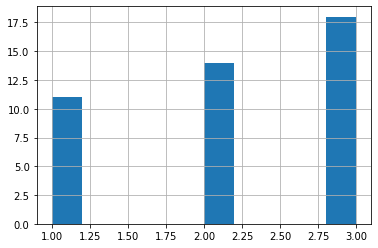

In [43]:
df.person_category.hist()

**BALANCE DE CLASES**: las clases 2 y 3 estan balanceadas, pero dado los pocos datos, la clase 1 no, ya que tiene un 61% de la clase 3.

### Mezca Aleatória y División en Train/Test
Primeramente, deberán mezclar los datos aleatoriamente. Luego, para dividir en Train/Test el dataset, aplicar el split utilizando un 20% de datos para este último.

En este punto, deberán obtener cuatro conjuntos de datos, para ambos datasets: X_train, X_test, y_train y y_test.


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X, y = df.drop(columns=['person_category']), df['person_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)
X_train.shape, X_test.shape

((34, 34), (9, 34))

In [46]:
X.drop(columns=[])

,person_age,person_experience,technology_name_AWS,technology_name_AWS Lambda,technology_name_Azure,technology_name_Docker,technology_name_EC2,technology_name_Golden Gate,technology_name_Google cloud,technology_name_Hadoop,...,technology_name_Spark,technology_name_Vertica,technology_name_java,technology_name_neo4j,technology_name_pentaho,technology_name_phyton,technology_name_scala,technology_name_talend,technology_name_unix,technology_name_windows
person_id,,,,,,,,,,,,,,,,,,,,,
02467c26b23155dc215c2330eaca4aea-c81e728d9d4c2f636f067f89cc14862c,36.0,8.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
044482b12ecb76435ae1a2cf1207010b-c81e728d9d4c2f636f067f89cc14862c,23.0,5.0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
0f8c54d6d08a6017f63ca125adb0df5d-c81e728d9d4c2f636f067f89cc14862c,39.0,5.0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
10c246e19e023f335e179b937c28a6da-c81e728d9d4c2f636f067f89cc14862c,25.0,2.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c,23.0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
39f10109db2b7f2bb204b52b89881df7-c81e728d9d4c2f636f067f89cc14862c,22.0,7.0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
3c6052e0f7e58eca265f85a3f6b929c3-c81e728d9d4c2f636f067f89cc14862c,24.0,4.0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
40527e3ae6c7d3c8b3bb760cce7f1959-c81e728d9d4c2f636f067f89cc14862c,42.0,9.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
471d44b3fde4daa8a34b4e8210a5269f-c81e728d9d4c2f636f067f89cc14862c,39.0,2.0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
#sns.pairplot(df,  hue="person_category", diag_kind = "hist")
#plt.savefig("Histotodo.jpg")

In [48]:
firstcolumns=['person_category','person_age','person_experience','technology_name_EC2','technology_name_Spark','technology_name_Vertica']

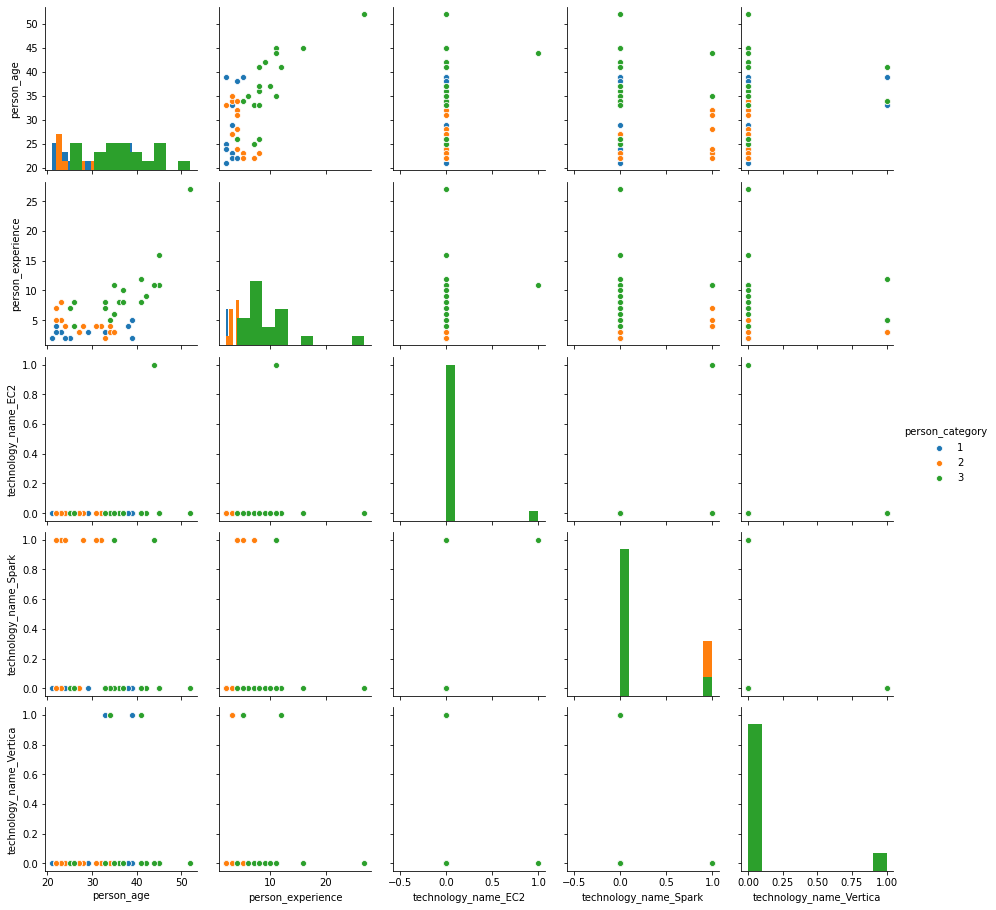

In [49]:
sns.pairplot(df[firstcolumns], hue="person_category", diag_kind = "hist")
#plt.savefig("Correlaciones Pearson.jpg")

##Aplicación de Modelos de Clasificación de Aprendizaje Automático Supervisado
Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación para el dataset seleccionado, utilizando la librería Scikit-Learn (o la que consideren apropiada):

1. Support Vector Machines (SVM), probando clasificadores con distintos kernels.
2. Random Forest, utilizando parámetros de normalización cuando lo crean adecuado.
3. Red neuronal.

Para cada uno de ellos, se pide responder las siguientes consignas:

* Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
* Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?

De estos tres modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

**Elegir el modelo que consideren que mejor aplica a nuestro problema.** Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

1. Descripción de la Hipótesis
¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

2. Selección de Regularizador
¿Utilizarán algún regularizador?¿Cuál?

3. Selección de Función de Costo
¿Cuál será la función de costo utilizada?

4. Justificación de las Selecciones
¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

* Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros (fine tuning).
Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
  * Accuracy o exactitud
  * Reporte de clasificación
  * Confusion matrix o matriz de confusión (graficar como heatmap)
  * Curva ROC y área bajo la curva (AUC).
* Es apropiado utilizar la métrica acuracy o exactitud como medida de performance de nuestro modelo, de acuerdo a los datos con los que contamos? Por qué?
### Entregables
El entregable de este práctico consiste en esta misma Notebook, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.


## SVM

In [50]:
from sklearn.svm import SVC
%matplotlib inline

import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.neural_network
import utils

In [51]:
svm = SVC( 
        C=1.0, 
        kernel='rbf', 
        degree=3, 
        gamma='scale', 
        coef0=0.0, 
        shrinking=True, 
        probability=False, 
        tol=0.001, 
        cache_size=200, 
        class_weight=None, 
        verbose=False, 
        max_iter=-1, 
        decision_function_shape='ovr', 
        break_ties=False, 
        random_state=None
        )

In [52]:
svm.fit(X_train,y_train)

SVC()

In [53]:
svm.predict(X_test)

array([3, 2, 3, 2, 2, 3, 2, 2, 3])

In [54]:
y_test

person_id
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f636f067f89cc14862c    1
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f636f067f89cc14862c    1
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f636f067f89cc14862c    1
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c    1
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c    2
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f636f067f89cc14862c    3
c720cbe09318399805229024f20a1822-c81e728d9d4c2f636f067f89cc14862c    2
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e71d9181a67b7542122c    2
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f636f067f89cc14862c    3
Name: person_category, dtype: int64

El SVM predijo correctamente 5 de 9 puntos.

In [55]:
svm.score(X_test, y_test, sample_weight=None)

0.5555555555555556

GRÁFICO: No se puede, es 36 dimensional.

In [56]:
#utils.plot_decision_boundary(lambda x: svm.predict(X_test_plot), X_test_plot, (y_test[1],y_test[2]))
#predictions = svm.predict(X_test)
#print ('Accuracy: %d ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

Vector de BIAS: En este caso el parámetro de regularización es el "C", que utiliza una penalidad cuadrádtica l2. Para optimizarlo usamos gridsearch.

## RANDOM FOREST

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
clf.predict(X_test)
print(y_test)

person_id
d223afb21e8ca34ae2d44eb0af24b1af-c81e728d9d4c2f636f067f89cc14862c    1
f453d1ba4bfc4a5d44dca8a807eb2eba-c81e728d9d4c2f636f067f89cc14862c    1
bdf84f48ea691b1319b9b745198083c3-c81e728d9d4c2f636f067f89cc14862c    1
1ae7f988daa7541df8d9eba692e3949d-c81e728d9d4c2f636f067f89cc14862c    1
51280652ee54bf9e25636110b859faf5-a87ff679a2f3e71d9181a67b7542122c    2
b53b93443a17d145268d697aed6b62f9-c81e728d9d4c2f636f067f89cc14862c    3
c720cbe09318399805229024f20a1822-c81e728d9d4c2f636f067f89cc14862c    2
533348a1f755b9512eb8b91aa07a300a-a87ff679a2f3e71d9181a67b7542122c    2
f496c7004f07dba853bf8fadc28c9650-c81e728d9d4c2f636f067f89cc14862c    3
Name: person_category, dtype: int64


In [58]:
clf.score(X_test, y_test, sample_weight=None)

0.6666666666666666

Este modelo predice bien el 100% de los casos. Por ende y por el mismo diseó del algoritmo, no vemos necesidad de optimización a primera vista. De todas maneras para cumplir con la consigna, si resultase ser el modelo elegido se lo procesará según lo indicado.

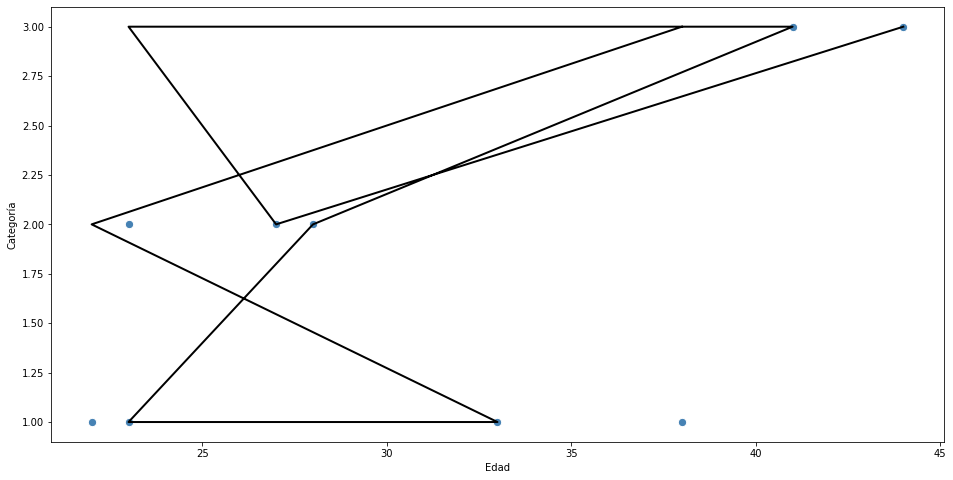

In [59]:
plt.figure(figsize=(16, 8))
plt.scatter(X_test['person_age'], y_test, c='steelblue',
            edgecolor='white', s=70)
plt.plot(X_test['person_age'], clf.predict(X_test),
         color='black', lw=2)
plt.xlabel('Edad')
plt.ylabel('Categoría')
plt.show()

## NEURAL NETWORK

In [60]:
from sklearn import neural_network
import matplotlib.pyplot as plt

In [61]:
clf = neural_network.MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5, 
    hidden_layer_sizes=(5, 2), 
    random_state=1, 
    max_iter=5000
)

In [62]:
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=5000,
              random_state=1, solver='lbfgs')

In [63]:
clf.predict(X_test)

array([3, 3, 3, 3, 3, 3, 3, 3, 3])

In [64]:
clf.score(X_test, y_test)

0.2222222222222222

La Red Neuronal tuvo el **peor** resultado de los modelos, prediciendo solo un tercio de los casos.

## Selección del modelo

Elegir el modelo que consideren que mejor aplica a nuestro problema. Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

Descripción de la Hipótesis ¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

Selección de Regularizador ¿Utilizarán algún regularizador?¿Cuál?

Selección de Función de Costo ¿Cuál será la función de costo utilizada?

Justificación de las Selecciones ¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros (fine tuning). Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
Accuracy o exactitud
Reporte de clasificación
Confusion matrix o matriz de confusión (graficar como heatmap)
Curva ROC y área bajo la curva (AUC).
Es apropiado utilizar la métrica acuracy o exactitud como medida de performance de nuestro modelo, de acuerdo a los datos con los que contamos? Por qué?


**Hipótesis**: El problema es clasificar el seniority de las personas, medido a través de "person_category", en función de la cantidad de tecnologías conocidas principalemente. La hipótesis nula es que a mayor número de tecnologías conocidas, mayor será la seniority. Adicionalmente se puede contemplar los años de experiencia de trabajo de cada individuo, siendo un factor clave para determinar el nivel de seniority.

**Selección de Regulizador**: los regulizadores tienen sentido en los modelos lineales, para evitar el overfitting de los modelos que lleva a la pérdida de capacidad predictiva fuera de la muestra de entrenamiento. Dado que se opta por un random forest esto se puede atacar desde varios parámetros del modelo. Para empezar, se puede determinar la profundidad máxima que puede tener cada árbol envitando el overfit. También es posible determinar el número mínimo de muestras para poder generar un split, si por ejemplo ese número es 10, no se podrá generar un nuevo split si se llega a una hoja con menos de ese número de datos. Otra forma de verlo, es poniendo un mínimo al número de muestras remanentes que quedarán en cada hoja final. Todos estos parámetros pueden ser optimizado con el uso de GridSearch

**Selección de Función de Costo**: Para el caso de Random Forest las funciones de costo pueden ser GINI o ENTROPIA. El costo de GINI es una medida de cuán a menudo un elemento elegido aleatoriamente del conjunto sería etiquetado incorrectamente si fue etiquetado de manera aleatoria de acuerdo a la distribución de las etiquetas en el subconjunto. , mientras que el de entropía es una medida de ganancia de información. Ambos serán evaluados a través de la optimización con GridSearch.

**Justificación**: Seleccionamos este modelo porque trás correr las primeras pruebas, parece ser el que mejor uso hace de las dummies de tecnología para poder generar la clasificación.

In [65]:
rfc = RandomForestClassifier(random_state=0)

param_grid = { 
    'criterion':('gini', 'entropy'),
    'max_depth': (2, 3, 4),
    'min_samples_leaf':(1, 2, 3),
    'min_samples_split':(2, 3, 5)
    }

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)

CV_rfc.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (2, 3, 4), 'min_samples_leaf': (1, 2, 3),
                         'min_samples_split': (2, 3, 5)})

In [66]:
CV_rfc.best_score_

0.7206349206349206

In [67]:
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=0)

In [68]:
y_predicted = CV_rfc.best_estimator_.predict(X_test)

In [69]:
import sklearn.metrics as metrics

In [70]:
metrics.confusion_matrix(y_test, y_predicted)

array([[4, 0, 0],
       [0, 2, 1],
       [0, 0, 2]])

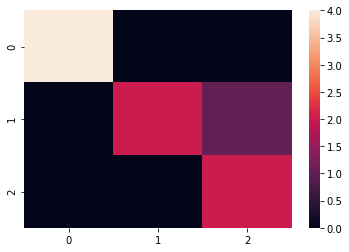

In [71]:
sns.heatmap(metrics.confusion_matrix(y_test, y_predicted))

In [72]:
'''
metrics.plot_roc_curve(CV_rfc.best_estimator_, X, y)
plt.show()     
'''

'\nmetrics.plot_roc_curve(CV_rfc.best_estimator_, X, y)\nplt.show()     \n'

Las curvas ROC no se pueden graficar en virtud de que estamos en un problema de clasificación multiclase. Para poder utilizar esta herramienta debe generarse un problema de clasificación binario del tipo 1 vs all.

Respecto a si es correcto utilizar Accuracy, Recall o una mezcla de ambas como métrica, nos inclinamos por Balanced Accuracy dado que queremos mejorar la precisión de las etiquetas pero dentro de un dataset desbalanceado.

In [ ]:
metrics.balanced_accuracy_score(y_test, y_predicted)